# Image Processing
Author: Elham Taghizadeh

September 2023

# Introduction and concepts

Images are NumPy’s arrays np.ndarray 


image:	np.ndarray

pixels:	array values: a[i, j]

channels:	array dimensions

image encoding:	dtype (np.uint8, np.uint16, np.float)



In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [23]:
im = imread('C:/Users/West/OneDrive/Desktop/lena.png')

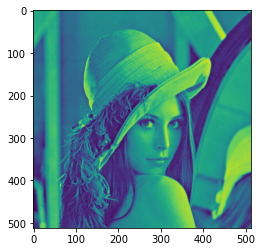

In [24]:
plt.imshow(im)

A: Gray scale digital image
A gray scale image is a digital image in which each pixel only contains one scalar value which is its intensity. The number of possible levels (intensity values) depends on the numerical type encoding the image.

For example, an image encoded with n=8 bits will only have L=28=256 possible intensity values going from 0 representing black to L-1=255 representing white.

B: Color image
A color image is a digital array of pixel containing a color information. Each image can be decomposed into three different layers according to the three color channels encoded: Red, Green and Blue.

For instance, a 8 eight bits color images encode the Red and Green channel with three bits and the blue with two. Which could encode 256 different colors.

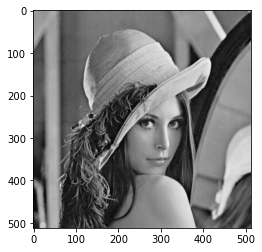

In [25]:
plt.imshow(im, cmap='gray')
# or
#plt.imshow(im, cmap=plt.cm.gray)

In [26]:
im1 = imread('C:/Users/West/OneDrive/Desktop/sushi1.png')

In [27]:
im1_no_alpha = im1[:, :, :3]

In [28]:
im1_no_alpha = im1[:, :, :-1]

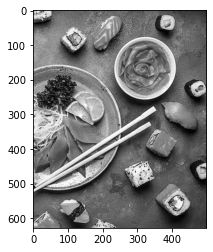

In [29]:
im1_gray = np.mean(im1_no_alpha, axis=2)
im1_gray.shape
plt.imshow(im1_gray, cmap='gray')
# or
#plt.imshow(im, cmap=plt.cm.gray)

In [30]:
img1 = imread('C:/Users/West/OneDrive/Desktop/dog-1.png')

In [31]:
print(type(img1))
print(img1.shape)
print(img1.ndim)
print(img1.dtype)
print(img1.nbytes)

<class 'numpy.ndarray'>
(766, 766, 4)
3
float32
9388096


In [32]:
img5=img1[:459,100:,:3]

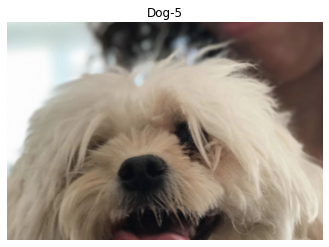

In [33]:
plt.imshow(img5)
plt.axis('off')
plt.title('Dog-5' )
plt.show ()

In [34]:
plt.imsave( 'C:/Users/West/OneDrive/Desktop/image-1.png' , img1)

In [35]:
img1_no_alpha = img1[:, :, :-2]

In [36]:
img1_no_alpha.shape

(766, 766, 2)

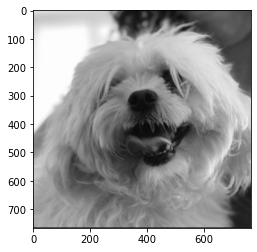

In [37]:
#img1_gray = np.mean(img1_no_alpha, axis=2)
img1_gray = np.mean(img1_no_alpha, axis=2)
#im1_gray.shape
plt.imshow(img1_gray, cmap='gray')
# or
#plt.imshow(im, cmap=plt.cm.gray)

In [38]:
op = np.array([1, 0.95, 0.9, .4])
img2= img1 * op

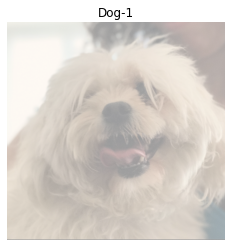

In [39]:
plt.imshow(img2)
plt.axis('off')
plt.title('Dog-1' )
plt.show ()

In [40]:
img1[:, :, 0] = 0.7    # Zero out contribution from green
img1[:, :, 1] = 0.6    # Zero out contribution from blue

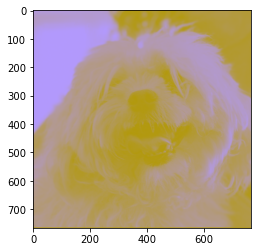

In [41]:
plt.imshow(img1)

For many use cases that's perfectly fine, but often we have to be aware of the difference and be able to convert between the formats. One way to do that would be the following function:

In [42]:
def im2float(im):
    return np.array(im / 255, dtype='float32')

#im2float(im_tiff)

# Introduction to image processing with scikit-image

In this tutorial, we will learn some basic techniques for image processing using `scikit-image <http://scikit-image.org>`__ with Python.

Image processing tools for Python

There are many image processing tools available for Python. Some of them, such as ITK and OpenCV are mature image processing packages that have bindings for Python, allowing easy use of their functionality. Others were developed specifically for Python. Some of the many packages are



scikit-image

scipy.ndimage

Open CV (extensive computer vision package)

Cell Profiler (Broad Institute at MIT)

Insight Segmentation and Registration Toolkit (ITK, used in medical imaging, supported by the NIH)

Fiji and ImageJ support Jython scripting

The first two packages are standard with Anaconda. They provide a set of basic image processing tools, with more sophisticated packages such as ITK and Fiji supplying many more bells and whistles. If in the future you have more demanding image processing requirements, the other packages can prove very useful.

We will almost exclusively use scikit-image along with the standard tools from NumPy. The package scipy.ndimage is quite useful, but we will use scikit-image, since it has expanded functionality. A potential annoyance with skimage is that the main package has minimal functionality, and you must import subpackages as needed. For example, to load and view images, you will need to import skimage.io. Importantly, skimage is well-documented, and you can access the documentation at http://scikit-image.org/.

# Loading and viewing images

We will now load and view the test images we will use for segmentation. We load the image using the skimage.io.imread(). The image is stored as a NumPy array. Each entry in the array is a pixel value. This is an important point: a digital image is data! It is a set of numbers with spatial positions.

In [43]:
from skimage.io import imread, imshow
from skimage import data

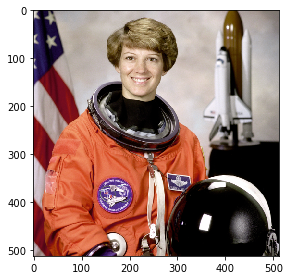

In [44]:
image = data.astronaut()
imshow(image)



In [45]:
plt.imsave( 'C:/Users/West/OneDrive/Desktop/image1.png' , image)

In [46]:
image

array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ...,
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        ...,
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [182, 167, 171],
        [185, 164, 176],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]

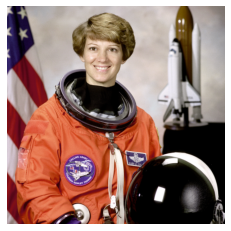

In [47]:
plt.imshow(image)
plt.axis('off')
plt.show ()

In [48]:
image.shape

(512, 512, 3)

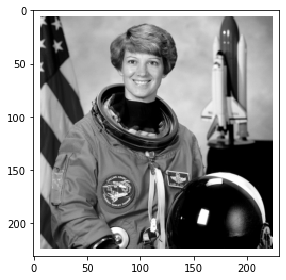

In [49]:
image_gray = imread('image1.png', as_gray=True)
imshow(image_gray)

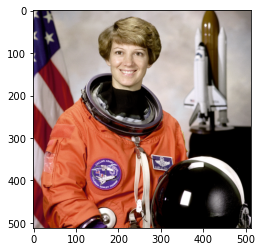

In [50]:
#plt.imshow(image, cmap='gray')
# or
plt.imshow(image, cmap=plt.cm.gray)

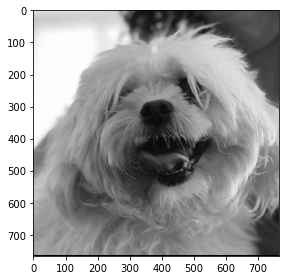

In [51]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline

image_gray = imread('image-1.png', as_gray=True)
imshow(image_gray)

In [52]:

#from skimage.color import rgb2gray
#img = rgb2gray(image)
#img = imread('image1.png')
#img_new = rgb2gray(img) 
#plt.show()

# resize

Image Resizing is the process of increasing or decreasing the size of an image.

What does it mean?

In terms of a 2-dimensional image, more specifically, it means scaling up/down the width and height of an image by computing the pixel values for the newer(or resized) image.

Example:

Consider the following high resolution image

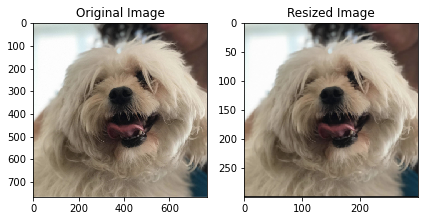

In [53]:
from skimage.transform import resize
img = imread('image-1.png')
#resize image
img_resized = resize(img, (300, 300))

#plot images
plt.subplot(121), imshow(img)
plt.title('Original Image')
plt.subplot(122), imshow(img_resized)
plt.title('Resized Image')
plt.show()

Let’s say you want to downscale this image for some reason — either you would want your photos to occupy less space on disk(not worrying about its quality anymore) or you would even want to train a neural network to detect Horses where the network’s input size is 300x300.

Why does one need to resize an image in the first place?

Resizing is one of the basic tasks in Image processing which is useful in image editing softwares or even when someone has to fit their profile pictures on social media platforms or for few other reasons I had mentioned above.

How does this work? or to be more precise, how are these pixel values for the new image calculated?

Interpolation:
    
Interpolation(in mathematics) means finding a new set of values for a function given a set of prior values for the same function.

There are different types of interpolation, a few being:

Nearest neighbour interpolation

Linear interpolation

Polynomial interpolation

Where is Interpolation used?

Interpolation is generally used to estimate new data points from the known data points by statisticians for better understanding of the underlying data, can be used to approximate complex functions for efficient experimentations or even used for scaling images!

# Image Resizing — Basic Idea:

A 2-d image is basically represented as a 2-dimensional matrix with each cell in the matrix containing a pixel value. So when we say scaling up this matrix, it means creating a bigger matrix than the original one and fill up the missing pixel values in this bigger matrix.